In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.color import label2rgb
from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import expand_labels, watershed

In [3]:
img = cv2.imread("/home/pedroazevedo141/Documents/Faculdade/Proj_Lind/last_try/123.png", 0)

In [4]:
# Make segmentation using edge-detection and watershed.
edges = sobel(img)

In [6]:
# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(img)
foreground, background = 1, 2
markers[img < 30.0] = background
markers[img > 150.0] = foreground

In [7]:
ws = watershed(edges, markers)
seg1 = label(ws == foreground)

expanded = expand_labels(seg1, distance=10)

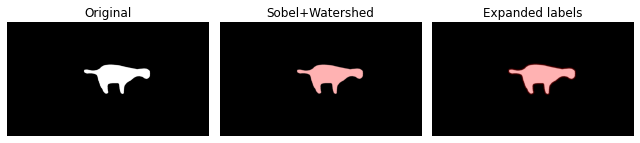

In [11]:
# Show the segmentations.
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(9, 5),
    sharex=True,
    sharey=True,
)

axes[0].imshow(img, cmap="Greys_r")
axes[0].set_title("Original")

color1 = label2rgb(seg1, image=img, bg_label=0)
axes[1].imshow(color1)
axes[1].set_title("Sobel+Watershed")

color2 = label2rgb(expanded, image=img, bg_label=0)
axes[2].imshow(color2)
axes[2].set_title("Expanded labels")


for a in axes:
    a.axis("off")
fig.tight_layout()
plt.show()